In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('data/cleaned_data.csv')

In [19]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [20]:
X=df.drop('total_score',axis=1)
y=df['total_score']

In [21]:
X.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333


In [22]:
y.head(2)

0    218
1    247
Name: total_score, dtype: int64

Transformation

In [23]:
nums = X.select_dtypes(include=np.number).columns
cats = X.select_dtypes(include='object').columns
print(nums)
print(cats)

Index(['math_score', 'reading_score', 'writing_score', 'average'], dtype='object')
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [24]:
# Transformation Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_tf = StandardScaler()
cat_tf = OneHotEncoder()
# It will combine the whole transformation process one after other
preprocessor = ColumnTransformer(
    [
        ('OnehotEncoder',cat_tf,cats),
        ('StandardScalar',num_tf,nums)
    ]
    
)




In [29]:
X=preprocessor.fit_transform(X)

In [30]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.19399858,
         0.39149181,  0.34357423],
       [ 1.        ,  0.        ,  0.        , ...,  1.42747598,
         1.31326868,  1.0219275 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.77010859,
         1.64247471,  1.74706375],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.12547206,
        -0.20107904, -0.19443008],
       [ 1.        ,  0.        ,  0.        , ...,  0.60515772,
         0.58901542,  0.46053169],
       [ 1.        ,  0.        ,  0.        , ...,  1.15336989,
         1.18158627,  1.06871048]])

In [31]:
X.shape

(1000, 21)

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 21), (200, 21))

In [35]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae,mse,rmse,r2_square

In [37]:
models =  {
    'LinearRegression': LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNN Regression":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
#    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]
# Training the Model
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Evaluation
    train_mae,train_mse,train_rmse,train_r2 = evaluate_model(y_train,y_train_pred)
    test_mae,test_mse,test_rmse,test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2))
    r2_list.append(test_r2)
    
    print('='*35)
    print('\n')
    

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0090
- Mean Absolute Error: 0.8075
- R2 Score: 0.9994
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0557
- Mean Absolute Error: 0.8312
- R2 Score: 0.9994


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0176
- Mean Absolute Error: 0.0143
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0193
- Mean Absolute Error: 0.0147
- R2 Score: 1.0000


KNN Regression
Model performance for Training set
- Root Mean Squared Error: 5.9460
- Mean Absolute Error: 4.6730
- R2 Score: 0.9803
-------------------------------

In [38]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,LinearRegression,1.000000
2,Ridge,1.000000
1,Lasso,0.999422
4,DecisionTreeRegressor,0.997644
6,XGBRegressor,0.997429
5,RandomForestRegressor,0.995926
7,AdaBoostRegressor,0.988751
3,KNN Regression,0.966842


In [39]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


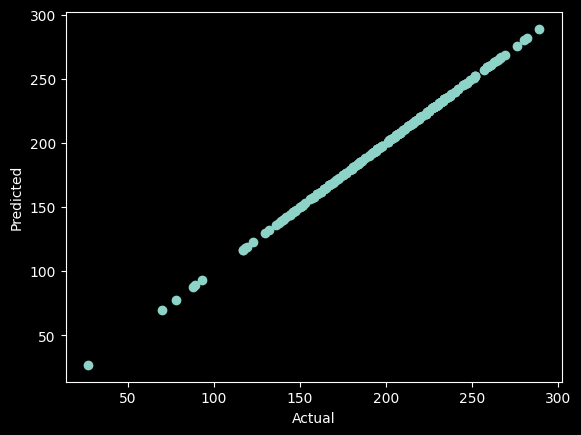

In [40]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

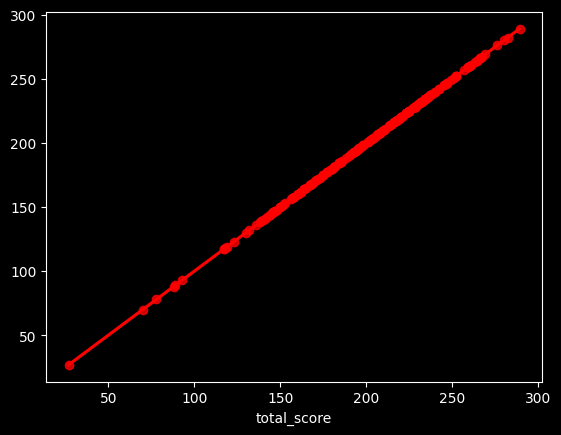

In [41]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [42]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,261,261.0,0.000000e+00
737,192,192.0,0.000000e+00
740,225,225.0,2.842171e-14
660,224,224.0,0.000000e+00
411,245,245.0,-2.842171e-14
...,...,...,...
408,165,165.0,0.000000e+00
332,171,171.0,0.000000e+00
208,231,231.0,0.000000e+00
613,216,216.0,2.842171e-14
